In [1]:
import numpy as np
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge , Lasso
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Data.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.shape

(300153, 12)

In [6]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [7]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [10]:
economy_df = df[df["class"] == "Economy"]
business_df = df[df["class"] == "Business"]

In [11]:
price_in_economy = economy_df.groupby("airline")["price"].median()

<Axes: ylabel='airline'>

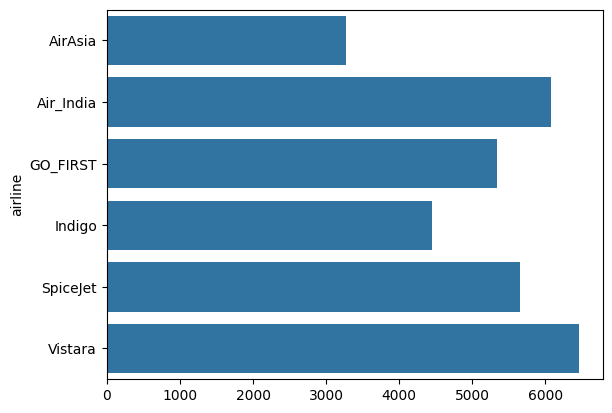

In [12]:
sns.barplot(x=price_in_economy.values,y=price_in_economy.index)

In [13]:
encoder = LabelEncoder()

df["airline"] = encoder.fit_transform(df["airline"])
df["source_city"] = encoder.fit_transform(df["source_city"])
df["departure_time"] = encoder.fit_transform(df["departure_time"])
df["stops"] = encoder.fit_transform(df["stops"])
df["arrival_time"] = encoder.fit_transform(df["arrival_time"])
df["destination_city"] = encoder.fit_transform(df["destination_city"])
df["class"] = encoder.fit_transform(df["class"])

In [35]:
df.head(300)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
295,1,2,2,0,5,5,1,24.75,3,10785
296,2,2,1,0,5,5,1,14.25,3,10863
297,3,2,5,0,4,5,1,10.42,3,10943
298,5,2,5,0,0,5,1,17.92,3,11415


In [15]:
df.drop(["Unnamed: 0", "flight"], axis=1, inplace=True)

<Axes: >

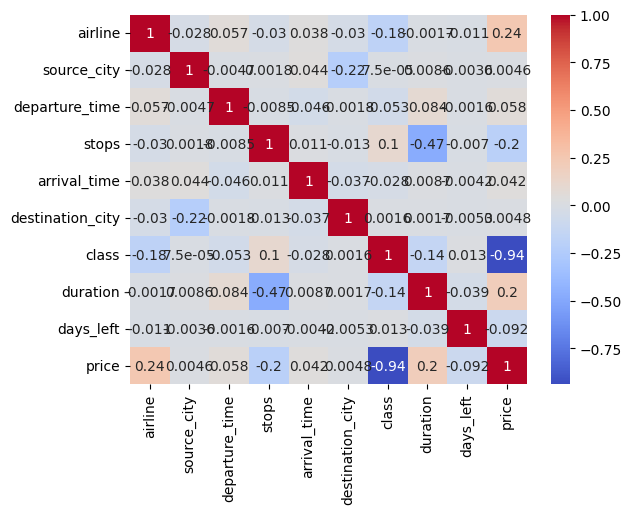

In [16]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

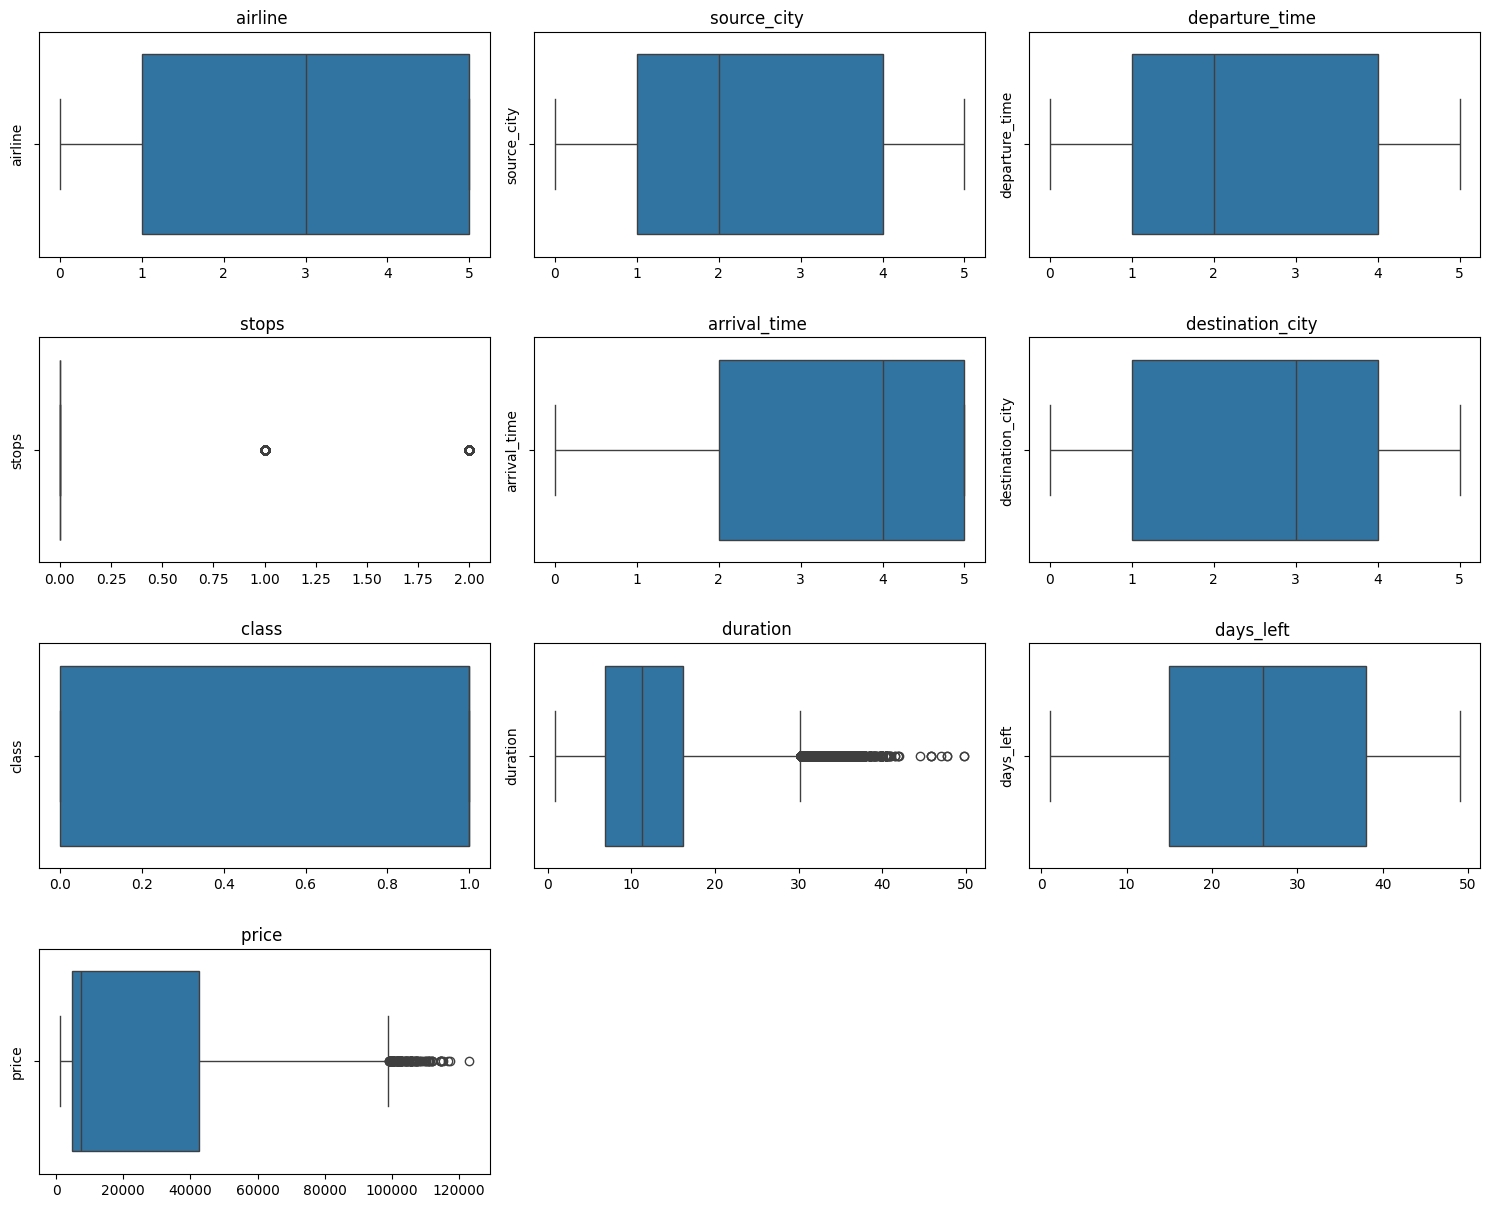

In [17]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

In [18]:
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)

In [19]:
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["duration"] < upper_limit) & (df["duration"] > lower_limit)]

In [20]:
X = df.drop("price", axis=1)
y = df["price"]


In [37]:
y.head(300)

0       5953
1       5953
2       5956
3       5955
4       5955
       ...  
295    10785
296    10863
297    10943
298    11415
299    11415
Name: price, Length: 300, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [45]:
lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("R2-score: ", f"{(r2_score(y_test, y_pred) * 100):0.1f}", "%")

R2-score:  90.5 %


In [41]:
rg = Ridge(alpha=5)
rg.fit(x_train, y_train)
y_predrg=rg.predict(x_test)
print("R2-score: ", f"{(r2_score(y_test, y_predrg) * 100):0.1f}", "%")

R2-score:  90.5 %


In [42]:
ls= Lasso(alpha=1000)
ls.fit(x_train,y_train)
y_pred_ls=rg.predict(x_test)
print("R2-score: ", f"{(r2_score(y_test, y_pred_ls) * 100):0.1f}", "%")

R2-score:  90.5 %


In [28]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
print("R2-score: ", f"{(r2_score(y_test, dt_pred) * 100):0.1f}", "%")

R2-score:  97.7 %


In [23]:
reg = RandomForestRegressor()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print("R2-score: ", f"{(r2_score(y_test, y_pred) * 100):0.1f}", "%")

R2-score:  98.5 %


In [27]:
xg=XGBRegressor()
xg.fit(x_train,y_train)
xg_pred = xg.predict(x_test)
print("R2-score: ", f"{(r2_score(y_test, xg_pred) * 100):0.1f}", "%")

R2-score:  97.6 %


In [33]:
import pickle
with open('XGmodel.pkl', 'wb') as model_file:
    pickle.dump(xg, model_file)
print("Model saved ")

Model saved 


In [38]:
import pickle
import numpy as np

# Path to the .pkl file
model_path = 'XGmodel.pkl'

# Load the model
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# Example input array: Adjust the values to fit your data schema
# The array should match the feature order and type used in training
input_array = np.array([[5,2,5,0,0,5,1,17.92,3]])

# Make a prediction
prediction = model.predict(input_array)

# Print the prediction
print(f'Predicted price: {prediction[0]}')


Predicted price: 13480.6572265625


In [ ]:
5	2	5	0	0	5	1	17.92	3